<a href="https://colab.research.google.com/github/ansh37/Machine_Learning/blob/main/CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABHISHEK PRATAP SINGH, P19CO005, *panwar.abhi07@gmail.com*

# Credit Card Fraud Detection using Reinforcement Learning


### Table of Contents

* [DataSet Setup and Preprocessing](#chapter1)
  
* [Autoencoder](#chapter2)
    
* [Trainning of LSTM based Agent](#chapter3)

* [Testing of Model and Result Simulations](#chapter4)

In [2]:
#necessary installation and logins
!pip install wandb

     |████████████████████████████████| 1.8MB 8.0MB/s 
     |████████████████████████████████| 133kB 41.1MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 174kB 41.0MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=329f367e7dfb5962c5f4fc0d552f5e4444507629d617cb153a1ca722f073cc54
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=dd3b4ed21c27647b18e2cbc38c1cf91f1b2e5683c815b3d875af6c90dad18d9f
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Imp Libs

import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from scipy.stats import norm
import matplotlib.pyplot as plt
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#related to nueral nets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Input
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from sklearn import metrics

#wandb and other libs
import wandb
from wandb.keras import WandbCallback


# DataSet Setup and Preprocessing <a class="anchor" id="chapter1"></a>

In [5]:
#dataset 
df = pd.read_csv('./drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
columns = df.columns

# Checking No Null Values!
df.isnull().sum().max()

0

In [7]:
# The classes are heavily skewed we need to solve this issue .
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


## Oversampling

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

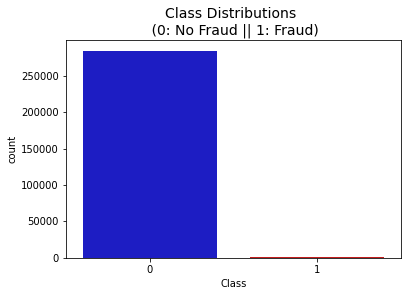

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[df.columns[:-1]], df[df.columns[-1]])
print('Original dataset shape', Counter(df[df.columns[-1]]))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [11]:
df_temp = np.concatenate((x_smote, y_smote.reshape(-1,1)),axis=1)
df_new = pd.DataFrame(df_temp, columns=columns)
df_new.shape

(568630, 31)

Distribution of the Classes in the oversample dataset
Class
1.0      0.5
0.0      0.5
dtype: float64


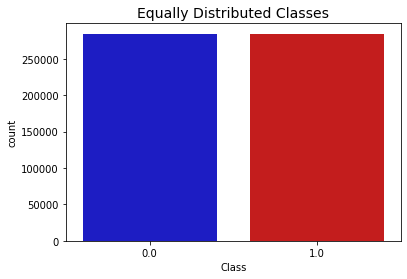

In [12]:
X, Y = df_new[columns[:-1]], df_new[columns[-1:]]

print('Distribution of the Classes in the oversample dataset')
print(Y.value_counts()/len(Y))

sns.countplot('Class', data=Y, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


## Properties of Data

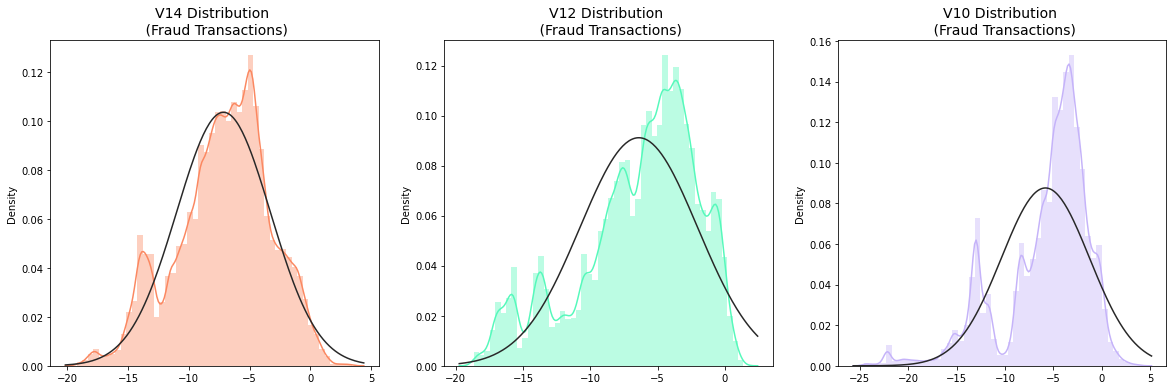

In [13]:
new_df = df_new
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()



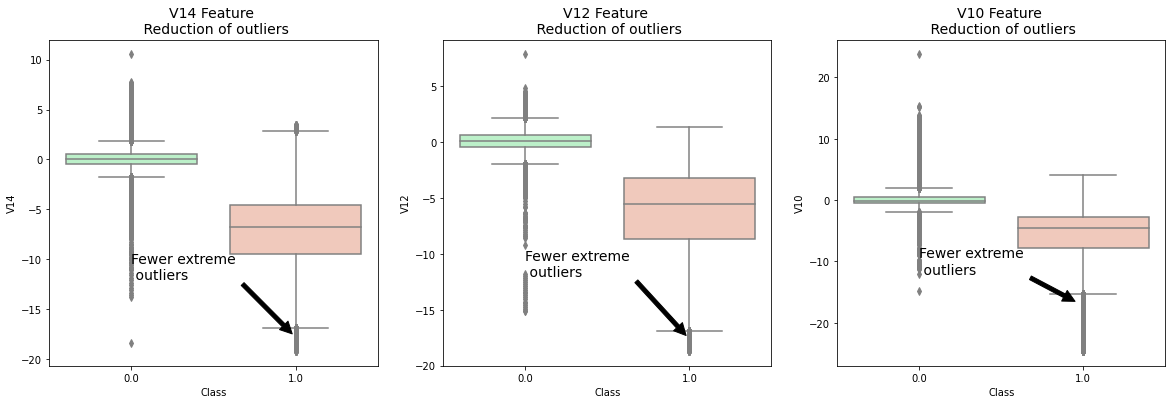

In [13]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

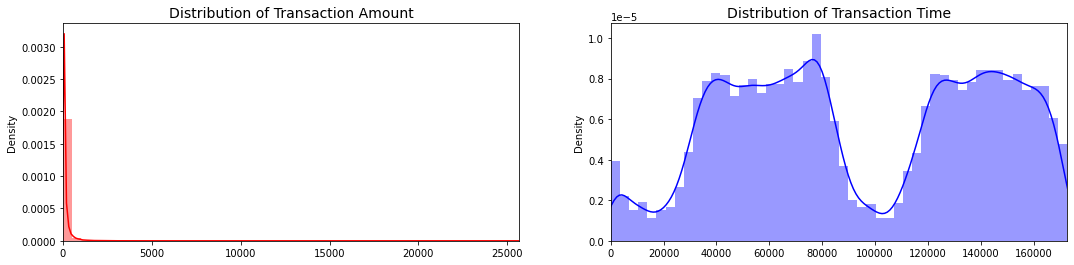

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [14]:
df_new = df_new.sample(frac=1)
df_new.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
342311,47969.859831,-0.904159,2.079384,-1.810223,1.604565,-1.202053,-1.694763,-1.904524,0.753810,-1.854144,-3.852547,2.486563,-3.383547,-0.146213,-4.430729,0.829513,-3.190401,-4.464888,-2.500722,-0.119059,0.229102,0.528016,0.104403,-0.017709,0.472039,-0.058407,0.324735,0.481183,0.259760,0.760000,1.0
189249,128320.000000,1.965269,-0.764238,-1.750300,-0.632261,1.704642,3.895588,-1.251404,1.037641,1.077358,0.029451,-0.224778,0.358016,-0.035038,-0.035572,0.731895,0.196340,-0.548809,-0.120095,-0.396139,-0.101700,0.197179,0.665806,0.165631,0.767571,-0.188213,0.633415,-0.004853,-0.054203,16.770000,0.0
339674,157959.075586,-3.101033,-1.508774,-5.530736,5.801244,3.129465,-3.579062,-2.616074,0.799498,-2.606331,-3.618878,2.823534,-3.398484,0.341037,-7.365848,0.243975,-1.554248,-0.724552,0.613901,0.564579,1.845525,0.852476,-0.308763,0.279436,-0.713001,-0.563810,-0.073833,0.487424,-0.404746,147.965395,1.0
251528,155381.000000,2.012594,0.118106,-1.602917,0.346244,0.398444,-0.657123,0.106058,-0.114898,0.187606,-0.217641,1.336151,1.014807,0.168488,-0.679812,-0.532771,0.448275,0.278306,0.100132,0.269232,-0.129947,-0.296030,-0.781358,0.344908,0.676023,-0.306974,0.141477,-0.065459,-0.037670,5.120000,0.0
408374,12448.491938,-3.662943,4.166103,-4.593339,5.190147,-2.189427,-0.597841,-3.225308,-1.474834,0.515454,-2.485498,5.494459,-9.785544,0.650433,-9.559144,-0.741159,-5.130036,-7.600758,-2.639522,-0.136734,0.017786,1.742817,0.033457,0.219281,0.026338,-0.556565,-0.126537,-1.684202,-0.244258,131.061031,1.0


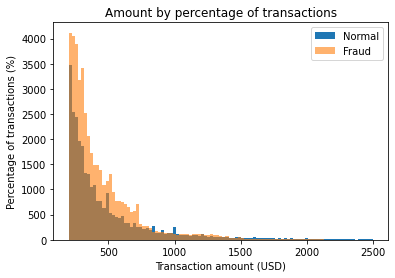

In [16]:
bins = np.linspace(200,2500,100)
plt.hist(new_df[new_df.Class == 0].Amount, bins, alpha=1, label='Normal')
plt.hist(new_df[new_df.Class == 1].Amount, bins, alpha=0.6, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

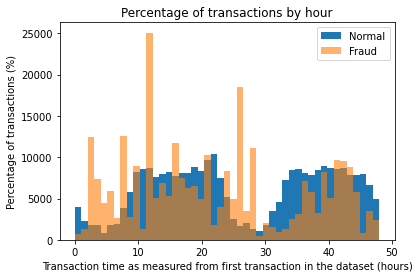

In [17]:
normal_df = new_df[new_df.Class == 0]
fraud_df =  new_df[new_df.Class == 1]


bins = np.linspace(0, 48, 48) #48 hours
plt.hist((normal_df.Time/(60*60)), bins, alpha=1,  label='Normal')
plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
#plt.hist((df.Time/(60*60)),bins)
plt.show()



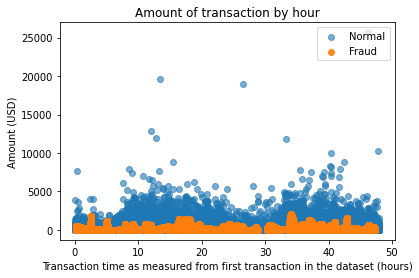

In [18]:
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

### Encoder Decoder LSTM Network 
#### that work as a agent

In [15]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [16]:
# Noramlization of time and amount

df_norm = df_new
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1)) 

In [21]:
df_normP = df_norm.head(130000)
X, Y = df_normP[df.columns[:-1]], df_normP[df.columns[-1:]]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

train_x, train_y = train_x.values, train_y.values #transform to ndarray
test_x, test_y = test_x.values, test_y.values

In [50]:
len(df_norm), train_x.shape,  train_y.shape, test_y.shape, test_x.shape

train_x = np.expand_dims(train_x,axis=2)
test_x = np.expand_dims(test_x,axis=2)

print(train_x.shape, test_x.shape)
train_y = np.asarray(train_y).astype('float32').reshape((-1,1))
test_y = np.asarray(test_y).astype('float32').reshape((-1,1))


print(test_y.shape, train_y.shape)


(91000, 30, 1) (39000, 30, 1)
(39000, 1) (91000, 1)


In [18]:
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epochs': {
            'values': [2, 5, 10, 15]
        },
        'batch_size': {
            'values': [256, 128, 64, 32, 16]
        },
        'dropout': {
            'values': [0.3, 0.4, 0.5]
        },
        }
    }



In [21]:
sweep_id = wandb.sweep(sweep_config, entity="ansh37", project="diss-91")


Create sweep with ID: jd7si9d8
Sweep URL: https://wandb.ai/ansh37/diss-91/sweeps/jd7si9d8


In [20]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [37]:
def agent():

  config_defaults = {
    'epochs': 5,
    'batch_size': 32,
    'weight_decay': 0.0005,
    'learning_rate': 0.003,
    'activation': 'relu',
    'optimizer': 'adam',
    'dropout': 0.5,
    'momentum': 0.9,
    'loss':'binary_crossentropy',
    'seed': 42
    }
  wandb.init(config=config_defaults)
  config = wandb.config

  classifier = Sequential()
 
  #Adding the input Enc-Dec network layer as encoder decoder
  classsfier.add(Dense(units=16, input_shape=(train_x.shape[1:]),activation = config.activation))
  classsfier.add(Dense(units=30,activation = config.activation))
  classifier.add(Dropout(0.2))

  # Adding LSTM as a Midiator Network
  classifier.add(CuDNNLSTM(30))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(64, activation=config.config.activation))
  classifier.add(Dropout(0.2))

  
  #Adding the output layer 
  classifier.add(Dense(1, activation=config.config.activation))
  
  classifier.compile( loss=config.loss_function,
              optimizer=Adam(lr=config.learning_rate, decay=1e-6),
              metrics=['accuracy'] )
  classifer.fit(train_x, train_y,
                      epochs=config.epochs,
                      batch_size=config.batch_size,
                      shuffle=True,
                      validation_data=(test_x, test_y),
                      verbose=1, callbacks=[WandbCallback(validation_data=(test_x, test_y)),
                                            EarlyStopping(patience=10, restore_best_weights=True)])
  

In [23]:
train_x, train_y, test_x, test_y = train_x.values, train_y.values, test_x.values, test_y.values

In [ ]:
wandb.agent(sweep_id, agent)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: g6hi6fpi with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
14241/14241 [==============================] - 62s 4ms/step - loss: 0.0174 - accuracy: 0.9984 - val_loss: 0.0073 - val_accuracy: 0.9992
Epoch 2/5
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0084 - val_accuracy: 0.9986
Epoch 3/5
14241/14241 [==============================] - 52s 4ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 4/5
14241/14241 [==============================] - 52s 4ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 5/5
14241/14241 [==============================] - 52s 4ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993


epoch,4
loss,0.00537
accuracy,0.9992
val_loss,0.00416
val_accuracy,0.9993
_runtime,276
_timestamp,1625293675
_step,4
best_val_loss,0.00339
best_epoch,3


epoch,▁▃▅▆█
loss,█▂▁▁▁
accuracy,▁▆▇▇█
val_loss,▆█▁▁▂
val_accuracy,▇▁▇▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 7jdezy60 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0176 - accuracy: 0.9970 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0031 - val_ac

epoch,9
loss,0.00336
accuracy,0.99927
val_loss,0.00329
val_accuracy,0.99928
_runtime,267
_timestamp,1625293950
_step,9
best_val_loss,0.00295
best_epoch,2


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▂▂▁
accuracy,▁▇▇▇█▇▆██▇
val_loss,▅█▁▆▂▂▂▅▁▃
val_accuracy,▆▄▂▁▃█▇█▄▂
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: qs6or1pp with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.3
wandb: 	epochs: 15


Epoch 1/15
891/891 [==============================] - 5s 4ms/step - loss: 0.0635 - accuracy: 0.9760 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 7/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 

epoch,14
loss,0.00248
accuracy,0.99935
val_loss,0.00306
val_accuracy,0.9994
_runtime,58
_timestamp,1625294018
_step,14
best_val_loss,0.00295
best_epoch,6


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁██████████████
val_loss,█▃▃▁▄▂▁▁█▇▃▅▄▄▂
val_accuracy,▅▂▇▇▇█▅█▅▇█▇█▁█
_runtime,▁▁▂▃▃▃▄▅▅▅▆▆▇▇█
_timestamp,▁▁▂▃▃▃▄▅▅▅▆▆▇▇█
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


wandb: Agent Starting Run: 6nrvuqcj with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.3
wandb: 	epochs: 10


Epoch 1/10
891/891 [==============================] - 5s 4ms/step - loss: 0.0452 - accuracy: 0.9896 - val_loss: 0.0041 - val_accuracy: 0.9983
Epoch 2/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0034 - val_accuracy: 0.9983
Epoch 3/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 4/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 6/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 7/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 

epoch,9
loss,0.00293
accuracy,0.99941
val_loss,0.00399
val_accuracy,0.99916
_runtime,41
_timestamp,1625294098
_step,9
best_val_loss,0.003
best_epoch,8


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▁▁▁▁▁▁▁
accuracy,▁▅▇███████
val_loss,█▄▅▃▃▂▆▆▁▇
val_accuracy,▁▁███████▇
_runtime,▁▂▂▃▄▅▆▆▇█
_timestamp,▁▂▂▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: urxcygcw with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
891/891 [==============================] - 5s 4ms/step - loss: 0.0650 - accuracy: 0.9856 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 3/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 5/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993


epoch,4
loss,0.00305
accuracy,0.9994
val_loss,0.00301
val_accuracy,0.99933
_runtime,24
_timestamp,1625294130
_step,4
best_val_loss,0.00301
best_epoch,4


epoch,▁▃▅▆█
loss,█▁▁▁▁
accuracy,▁▇███
val_loss,▅▂▁█▁
val_accuracy,█▆▆▁▆
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: j611ztol with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2


Epoch 1/2
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0166 - accuracy: 0.9972 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 2/2
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9992


epoch,1
loss,0.00424
accuracy,0.99926
val_loss,0.00385
val_accuracy,0.99917
_runtime,60
_timestamp,1625294197
_step,1
best_val_loss,0.00385
best_epoch,1


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,█▁
val_accuracy,▁█
_runtime,▁█
_timestamp,▁█
_step,▁█


wandb: Agent Starting Run: 4rnan9oo with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epochs: 5


Epoch 1/5
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0212 - accuracy: 0.9926 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 3/5
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 4/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 5/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9992


epoch,4
loss,0.00366
accuracy,0.99929
val_loss,0.00373
val_accuracy,0.99923
_runtime,139
_timestamp,1625294344
_step,4
best_val_loss,0.00338
best_epoch,0


epoch,▁▃▅▆█
loss,█▂▂▂▁
accuracy,▁████
val_loss,▁▅█▄▂
val_accuracy,█▅▁▆▄
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: txps6cox with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0145 - accuracy: 0.9984 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 2/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 4/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0101 - val_accuracy: 0.9993
Epoch 6/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0045 - val_ac

epoch,9
loss,0.00335
accuracy,0.99938
val_loss,0.00328
val_accuracy,0.9994
_runtime,273
_timestamp,1625294635
_step,9
best_val_loss,0.00276
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▃▂▂▂▁
accuracy,▁▇▆██▇▇▇▇█
val_loss,▂▂▂▁█▁▃▂▂▁
val_accuracy,▆▇▁█▆█▆▆▆█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: 1csrs3c8 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 15


Epoch 1/15
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0390 - accuracy: 0.9900 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 3/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 4/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy:

epoch,13
loss,0.00252
accuracy,0.99945
val_loss,0.00284
val_accuracy,0.9994
_runtime,101
_timestamp,1625294744
_step,13
best_val_loss,0.00282
best_epoch,3


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁
accuracy,▁▇▇▇██████████
val_loss,▄▄▄▁▂▃█▂▃▃▁▃▂▁
val_accuracy,▅▇▆▅▃▅▃▅▁▂▄▇█▇
_runtime,▁▂▂▃▃▄▄▅▅▆▆▇▇█
_timestamp,▁▂▂▃▃▄▄▅▅▆▆▇▇█
_step,▁▂▂▃▃▄▄▅▅▆▆▇▇█


wandb: Agent Starting Run: 13wok93e with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epochs: 2


Epoch 1/2
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0177 - accuracy: 0.9977 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 2/2
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9994


epoch,1
loss,0.00451
accuracy,0.99929
val_loss,0.00312
val_accuracy,0.99935
_runtime,60
_timestamp,1625294811
_step,1
best_val_loss,0.00312
best_epoch,1


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,█▁
val_accuracy,▁█
_runtime,▁█
_timestamp,▁█
_step,▁█


wandb: Agent Starting Run: dhcve21d with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
891/891 [==============================] - 5s 4ms/step - loss: 0.0418 - accuracy: 0.9980 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 2/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994


epoch,4
loss,0.00321
accuracy,0.99937
val_loss,0.00302
val_accuracy,0.99937
_runtime,25
_timestamp,1625294845
_step,4
best_val_loss,0.00302
best_epoch,4


epoch,▁▃▅▆█
loss,█▂▁▁▁
accuracy,▁▂▇██
val_loss,█▇▂▃▁
val_accuracy,▁██▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 7udfa0t5 with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.4
wandb: 	epochs: 10


Epoch 1/10
891/891 [==============================] - 5s 4ms/step - loss: 0.0555 - accuracy: 0.9939 - val_loss: 0.0038 - val_accuracy: 0.9983
Epoch 2/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0035 - val_accuracy: 0.9983
Epoch 3/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 5/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 6/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0069 - val_accuracy: 0.9994
Epoch 7/10
891/891 [==============================] - 4s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0064 - val_accuracy: 0.9993
Epoch 

epoch,9
loss,0.00295
accuracy,0.99945
val_loss,0.00314
val_accuracy,0.99933
_runtime,43
_timestamp,1625294895
_step,9
best_val_loss,0.00314
best_epoch,9


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
accuracy,▁▃▆███████
val_loss,▂▂▂▄▂█▇▆▁▁
val_accuracy,▁▁████████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: tk27as9o with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 15


Epoch 1/15
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0232 - accuracy: 0.9958 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 2/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 3/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 4/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 5/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 6/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 7/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0033 - val_ac

epoch,14
loss,0.00271
accuracy,0.99934
val_loss,0.00849
val_accuracy,0.9993
_runtime,209
_timestamp,1625295112
_step,14
best_val_loss,0.00313
best_epoch,4


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▃▂▂▂▂▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█▇███████▇
val_loss,▂▂▁▁▁▂▁▃▁▃▂▂▃▃█
val_accuracy,▇▁▆▄▇▇█▆█▆▄▆▆▅▃
_runtime,▁▂▂▃▃▃▄▅▅▆▆▇▇▇█
_timestamp,▁▂▂▃▃▃▄▅▅▆▆▇▇▇█
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


wandb: Agent Starting Run: zei89t4x with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
891/891 [==============================] - 5s 4ms/step - loss: 0.0612 - accuracy: 0.9860 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 2/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9983
Epoch 3/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 5/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0088 - val_accuracy: 0.9992
Epoch 6/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 7/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 

epoch,9
loss,0.00281
accuracy,0.99941
val_loss,0.0034
val_accuracy,0.99926
_runtime,42
_timestamp,1625295162
_step,9
best_val_loss,0.00324
best_epoch,8


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
accuracy,▁▅▇███████
val_loss,▃▃▁▃█▃▂▇▁▁
val_accuracy,▁▁██▇██▇▇█
_runtime,▁▂▂▃▄▅▆▇▇█
_timestamp,▁▂▂▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: yf5sgisy with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.4
wandb: 	epochs: 15


Epoch 1/15
891/891 [==============================] - 5s 4ms/step - loss: 0.0461 - accuracy: 0.9945 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 3/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 4/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 7/15
891/891 [==============================] - 3s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 

epoch,14
loss,0.00242
accuracy,0.9995
val_loss,0.00304
val_accuracy,0.99946
_runtime,60
_timestamp,1625295231
_step,14
best_val_loss,0.00291
best_epoch,8


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆█▇▇█▇████████
val_loss,▇▅▄▂▃▁▁▁▁█▂▁▂▄▂
val_accuracy,▇▅▂▅▂▅▁▃▆▅▆▅▄▄█
_runtime,▁▁▂▂▃▃▄▅▅▆▆▇▇▇█
_timestamp,▁▁▂▂▃▃▄▅▅▆▆▇▇▇█
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


wandb: Agent Starting Run: 20fetgqk with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 10


Epoch 1/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0214 - accuracy: 0.9964 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 2/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 3/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 5/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0032 - val_ac

epoch,9
loss,0.00322
accuracy,0.9994
val_loss,0.00359
val_accuracy,0.99935
_runtime,143
_timestamp,1625295382
_step,9
best_val_loss,0.00289
best_epoch,8


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▁▁▁▁▁▁▁
accuracy,▁█▇███████
val_loss,█▃▂▄▃▃▂▂▁▄
val_accuracy,▁▄▅▄▂▄▂▇█▅
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: 0ib6h495 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.4
wandb: 	epochs: 5


Epoch 1/5
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0408 - accuracy: 0.9918 - val_loss: 0.0035 - val_accuracy: 0.9983
Epoch 2/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994


epoch,4
loss,0.00323
accuracy,0.99936
val_loss,0.00342
val_accuracy,0.99935
_runtime,43
_timestamp,1625295433
_step,4
best_val_loss,0.00299
best_epoch,2


epoch,▁▃▅▆█
loss,█▂▁▁▁
accuracy,▁████
val_loss,▆▆▁█▅
val_accuracy,▁▇███
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 10vw0pt3 with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
14241/14241 [==============================] - 55s 4ms/step - loss: 0.0150 - accuracy: 0.9973 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 2/10
14241/14241 [==============================] - 54s 4ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 3/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 4/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 5/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.0245 - val_accuracy: 0.9992
Epoch 6/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 7/10
14241/14241 [==============================] - 52s 4ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0

epoch,9
loss,0.00712
accuracy,0.99883
val_loss,0.00395
val_accuracy,0.999
_runtime,537
_timestamp,1625295985
_step,9
best_val_loss,0.00395
best_epoch,9


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▁▃▂▅▁▁▇
accuracy,▁▇██▇▇▇▆▆▃
val_loss,▂▁▁▁█▁▂▁▁▁
val_accuracy,█▆██▇▇▁▇█▅
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: kdvuusc2 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 2/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 4/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9993


epoch,4
loss,0.00358
accuracy,0.9993
val_loss,0.00367
val_accuracy,0.99933
_runtime,140
_timestamp,1625296134
_step,4
best_val_loss,0.00315
best_epoch,2


epoch,▁▃▅▆█
loss,█▃▂▂▁
accuracy,▁▇███
val_loss,▆▅▁█▄
val_accuracy,▇▆█▁█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: gqo5ewam with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 2/5
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/5
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/5
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0093 - val_accuracy: 0.9993
Epoch 5/5
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9993


epoch,4
loss,0.00374
accuracy,0.99938
val_loss,0.00354
val_accuracy,0.99933
_runtime,75
_timestamp,1625296217
_step,4
best_val_loss,0.00315
best_epoch,2


epoch,▁▃▅▆█
loss,█▂▂▂▁
accuracy,▁████
val_loss,▂▁▁█▁
val_accuracy,▆▆▆▁█
_runtime,▁▃▄▆█
_timestamp,▁▃▄▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: i6m9se3m with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epochs: 5


Epoch 1/5
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0153 - accuracy: 0.9983 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 3/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9994


epoch,4
loss,0.00383
accuracy,0.99928
val_loss,0.003
val_accuracy,0.99939
_runtime,140
_timestamp,1625296366
_step,4
best_val_loss,0.003
best_epoch,4


epoch,▁▃▅▆█
loss,█▃▁▁▁
accuracy,▁▇██▇
val_loss,▂█▂▇▁
val_accuracy,▇▄▄▁█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: duzhstbw with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 2


Epoch 1/2
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0309 - accuracy: 0.9915 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/2
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9993


epoch,1
loss,0.00382
accuracy,0.99932
val_loss,0.00355
val_accuracy,0.99932
_runtime,35
_timestamp,1625296409
_step,1
best_val_loss,0.0034
best_epoch,0


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,▁█
val_accuracy,█▁
_runtime,▁█
_timestamp,▁█
_step,▁█


wandb: Agent Starting Run: 6zypro5e with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 5


Epoch 1/5
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0400 - accuracy: 0.9933 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 2/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 3/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 5/5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993


epoch,4
loss,0.00307
accuracy,0.99936
val_loss,0.00317
val_accuracy,0.99932
_runtime,42
_timestamp,1625296460
_step,4
best_val_loss,0.00302
best_epoch,3


epoch,▁▃▅▆█
loss,█▂▁▁▁
accuracy,▁▇███
val_loss,█▄▅▁▄
val_accuracy,▁▁█▃▄
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: ozkprhgg with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0215 - accuracy: 0.9975 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 3/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 4/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 5/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/10
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 7/10
3561/3561 [==============================] - 14s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0029 - val_ac

epoch,9
loss,0.00327
accuracy,0.99937
val_loss,0.00372
val_accuracy,0.99937
_runtime,143
_timestamp,1625296611
_step,9
best_val_loss,0.00295
best_epoch,6


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▂▂▂▂▁▁▂
accuracy,▁▇▇▇█▇████
val_loss,▁█▂▄▂▁▁▁▂▃
val_accuracy,▇▄▂▁█▇▅▅▇▇
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: qxv9u7fy with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epochs: 10


Epoch 1/10
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0171 - accuracy: 0.9978 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 7/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0041 - val_ac

epoch,9
loss,0.00335
accuracy,0.99935
val_loss,0.00778
val_accuracy,0.99916
_runtime,272
_timestamp,1625296898
_step,9
best_val_loss,0.00342
best_epoch,1


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▃▃▃▂▁▂▁
accuracy,▁▆▇▇▇▇▇▆██
val_loss,▂▁▂▁▁▅▂▁▄█
val_accuracy,█▇▇▅▇▅▇▇▆▁
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: x9mjb8iq with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.3
wandb: 	epochs: 5


Epoch 1/5
891/891 [==============================] - 5s 4ms/step - loss: 0.0634 - accuracy: 0.9852 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 3/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 5/5
891/891 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9993


epoch,4
loss,0.00318
accuracy,0.99932
val_loss,0.00293
val_accuracy,0.99932
_runtime,25
_timestamp,1625296932
_step,4
best_val_loss,0.00293
best_epoch,4


epoch,▁▃▅▆█
loss,█▁▁▁▁
accuracy,▁████
val_loss,█▄▃▁▁
val_accuracy,█▃▅█▁
_runtime,▁▃▄▆█
_timestamp,▁▃▄▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: kfr3ftwi with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epochs: 5


Epoch 1/5
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 2/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 4/5
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/5
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993


epoch,4
loss,0.0043
accuracy,0.99937
val_loss,0.00358
val_accuracy,0.99933
_runtime,140
_timestamp,1625297081
_step,4
best_val_loss,0.00341
best_epoch,1


epoch,▁▃▅▆█
loss,█▂▁▁▁
accuracy,▁████
val_loss,█▁▁▃▂
val_accuracy,▁█▆▄▇
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: gcpg6xcd with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.4
wandb: 	epochs: 2


Epoch 1/2
1781/1781 [==============================] - 9s 4ms/step - loss: 0.0348 - accuracy: 0.9924 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 2/2
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994


epoch,1
loss,0.00384
accuracy,0.99935
val_loss,0.00317
val_accuracy,0.99935
_runtime,23
_timestamp,1625297112
_step,1
best_val_loss,0.0031
best_epoch,0


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,▁█
val_accuracy,▁█
_runtime,▁█
_timestamp,▁█
_step,▁█


wandb: Agent Starting Run: ue0gy8rx with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.3
wandb: 	epochs: 10


Epoch 1/10
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0304 - accuracy: 0.9945 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 3/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 7/10
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy:

epoch,9
loss,0.00269
accuracy,0.99936
val_loss,0.00358
val_accuracy,0.99928
_runtime,75
_timestamp,1625297195
_step,9
best_val_loss,0.00275
best_epoch,6


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▂▁▁▁▁▁▁
accuracy,▁▇▇▇▇█████
val_loss,▂█▂▂▃▃▁▂▂▄
val_accuracy,▅▅▅▃▅▃▄▇█▁
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: ir2tsv1w with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 2


Epoch 1/2
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/2
3561/3561 [==============================] - 14s 4ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0062 - val_accuracy: 0.9993


epoch,1
loss,0.0044
accuracy,0.99932
val_loss,0.00621
val_accuracy,0.99932
_runtime,36
_timestamp,1625297239
_step,1
best_val_loss,0.00398
best_epoch,0


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,▁█
val_accuracy,▁█
_runtime,▁█
_timestamp,▁█
_step,▁█


wandb: Agent Starting Run: sjguyxkc with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 15


Epoch 1/15
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 2/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/15
3561/3561 [==============================] - 14s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/15
3561/3561 [==============================] - 14s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/15
3561/3561 [==============================] - 14s 4ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 6/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 7/15
3561/3561 [==============================] - 13s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0032 - val_ac

epoch,14
loss,0.00318
accuracy,0.99932
val_loss,0.00394
val_accuracy,0.99933
_runtime,211
_timestamp,1625297459
_step,14
best_val_loss,0.00296
best_epoch,4


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▂▂▂▂▁▁▁▁▁▁▂▁▁
accuracy,▁██████████████
val_loss,▇▂▁▂▁▂▂▂▄▁▆▅█▅▅
val_accuracy,▂█▃▃▄▃▃▆▃▆█▄▁▅▄
_runtime,▁▂▂▃▃▄▄▅▅▆▆▇▇██
_timestamp,▁▂▂▃▃▄▄▅▅▆▆▇▇██
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


wandb: Agent Starting Run: qmikr1lj with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10


Epoch 1/10
7121/7121 [==============================] - 29s 4ms/step - loss: 0.0212 - accuracy: 0.9975 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0060 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 6/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0038 - val_ac

epoch,9
loss,0.00342
accuracy,0.99933
val_loss,0.0038
val_accuracy,0.99939
_runtime,278
_timestamp,1625297796
_step,9
best_val_loss,0.00324
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▄▂▃▂▂▁▁
accuracy,▁█▇▆▇▇▇███
val_loss,▂▁█▁▂▂▃█▅▃
val_accuracy,▆▄▅▅▁▂▄▅▆█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: v0lir41j with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.3
wandb: 	epochs: 10


Epoch 1/10
891/891 [==============================] - 5s 4ms/step - loss: 0.0474 - accuracy: 0.9878 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 2/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0035 - val_accuracy: 0.9983
Epoch 3/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 4/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 5/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 7/10
891/891 [==============================] - 3s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 

epoch,9
loss,0.00277
accuracy,0.9994
val_loss,0.00519
val_accuracy,0.9993
_runtime,42
_timestamp,1625297846
_step,9
best_val_loss,0.00321
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▂▁▁▁▁▁▁
accuracy,▁▅▇███████
val_loss,▂▂▁▄▁▂▂▄█▅
val_accuracy,▁▁▇▇█▇█▇█▇
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: atcxhedq with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.3
wandb: 	epochs: 10


Epoch 1/10
14241/14241 [==============================] - 56s 4ms/step - loss: 0.0211 - accuracy: 0.9957 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 2/10
14241/14241 [==============================] - 54s 4ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/10
14241/14241 [==============================] - 54s 4ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 5/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 6/10
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 7/10
14241/14241 [==============================] - 52s 4ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0

epoch,9
loss,0.00673
accuracy,0.99894
val_loss,0.00392
val_accuracy,0.99917
_runtime,539
_timestamp,1625298394
_step,9
best_val_loss,0.00373
best_epoch,1


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▃▃▂▁▁▁▂▄
accuracy,▁█▇▆▆▇██▆▅
val_loss,▃▁▁▄█▂▁▄▂▁
val_accuracy,▄▆▅▄█▆▅▁▅▂
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: suqtvjuj with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.4
wandb: 	epochs: 15


Epoch 1/15
14241/14241 [==============================] - 55s 4ms/step - loss: 0.0152 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 2/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 4/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 5/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 6/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 7/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0

epoch,14
loss,0.00419
accuracy,0.99916
val_loss,0.00612
val_accuracy,0.9993
_runtime,802
_timestamp,1625299236
_step,14
best_val_loss,0.00335
best_epoch,7


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,▅▂▁▂▃▂▁▁▂▂▄▃▁█▁
accuracy,▄▇█▆▅▇▆▇▄▇▄▄▅▁▆
val_loss,▃▁▂▂▁▁▁▁▅▂▄▁▃█▄
val_accuracy,█████▇▇█▁▆▇▇███
_runtime,▁▂▂▃▃▄▄▅▅▆▆▇▇▇█
_timestamp,▁▂▂▃▃▄▄▅▅▆▆▇▇▇█
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


wandb: Agent Starting Run: g91rmzxf with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.3
wandb: 	epochs: 15


Epoch 1/15
14241/14241 [==============================] - 55s 4ms/step - loss: 0.0157 - accuracy: 0.9978 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 2/15
14241/14241 [==============================] - 51s 4ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.0080 - val_accuracy: 0.9993
Epoch 3/15
14241/14241 [==============================] - 55s 4ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0089 - val_accuracy: 0.9992
Epoch 4/15
14241/14241 [==============================] - 53s 4ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 5/15
 9339/14241 [==================>...........] - ETA: 16s - loss: 0.0040 - accuracy: 0.9994